In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from pymatgen.util.plotting_utils import get_publication_quality_plot

In [2]:
import numpy as np
import pandas as pd

In [3]:
ls

Q9.ipynb           Si_50_9_10.22.out  Si_50_9_10.28.out  Si_50_9_10.32.out  Si_50_9_10.35.out  Si_50_9_10.38.out  Si_50_9_10.42.out  Si_50_9_10.48.out  Si_50_9_10.75.out  Si_50_9_9.5.out    run_pw.py*
Si_50_9_10.1.out   Si_50_9_10.24.out  Si_50_9_10.3.out   Si_50_9_10.33.out  Si_50_9_10.36.out  Si_50_9_10.39.out  Si_50_9_10.44.out  Si_50_9_10.5.out   Si_50_9_10.out     analyze.py*
Si_50_9_10.2.out   Si_50_9_10.26.out  Si_50_9_10.31.out  Si_50_9_10.34.out  Si_50_9_10.37.out  Si_50_9_10.4.out   Si_50_9_10.46.out  Si_50_9_10.7.out   Si_50_9_6.out      results.csv


In [12]:
datafile = pd.read_csv('results.csv')

In [13]:
datafile.head(0)

,filename,ecut,nkpts,alat,energy,total_force,cpu_time
0,Si_50_9_9.5.out,50,35,9.50,-89.242348,0,2.3
1,Si_50_9_10.out,50,35,10.00,-89.285942,0,3.2
2,Si_50_9_10.05.out,50,35,10.05,-89.287416,0,3.2
3,Si_50_9_10.1.out,50,35,10.10,-89.288451,0,4.6
4,Si_50_9_10.15.out,50,35,10.15,-89.289067,0,4.7
5,Si_50_9_10.16.out,50,35,10.16,-89.289142,0,4.6
6,Si_50_9_10.17.out,50,35,10.17,-89.289201,0,4.6
7,Si_50_9_10.18.out,50,35,10.18,-89.289245,0,4.6
8,Si_50_9_10.19.out,50,35,10.19,-89.289274,0,4.6
9,Si_50_9_10.2.out,50,35,10.20,-89.289287,0,4.6


In [14]:
datafile.ix[datafile['energy'].idxmin()]

filename       Si_50_9_10.21.out
ecut                          50
nkpts                         35
alat                       10.21
energy                 -89.28929
total_force                    0
cpu_time                     4.7
Name: 10, dtype: object

In [34]:
datafile_mod = datafile[(datafile['alat']>9.5) & (datafile['alat']<10.48)]

In [16]:
datafile_mod.head()

,filename,ecut,nkpts,alat,energy,total_force,cpu_time
1,Si_50_9_10.out,50,35,10.00,-89.285942,0,3.2
2,Si_50_9_10.05.out,50,35,10.05,-89.287416,0,3.2
3,Si_50_9_10.1.out,50,35,10.10,-89.288451,0,4.6
4,Si_50_9_10.15.out,50,35,10.15,-89.289067,0,4.7
5,Si_50_9_10.16.out,50,35,10.16,-89.289142,0,4.6


In [35]:
x = datafile_mod['alat'].tolist()
x

[10.0,
 10.050000000000001,
 10.1,
 10.15,
 10.16,
 10.17,
 10.18,
 10.19,
 10.199999999999999,
 10.210000000000001,
 10.220000000000001,
 10.23,
 10.24,
 10.25,
 10.26,
 10.279999999999999,
 10.300000000000001,
 10.32,
 10.34,
 10.369999999999999,
 10.4,
 10.44]

In [38]:
datafile_mod.ix[datafile_mod['energy'].idxmax()]

filename       Si_50_9_10.44.out
ecut                          50
nkpts                         35
alat                       10.44
energy                 -89.28537
total_force                    0
cpu_time                     4.8
Name: 22, dtype: object

In [36]:
y_energy = datafile_mod['energy'].tolist()
# y_conver = datafile['Force Difference (meV/Angstrom)'].tolist()

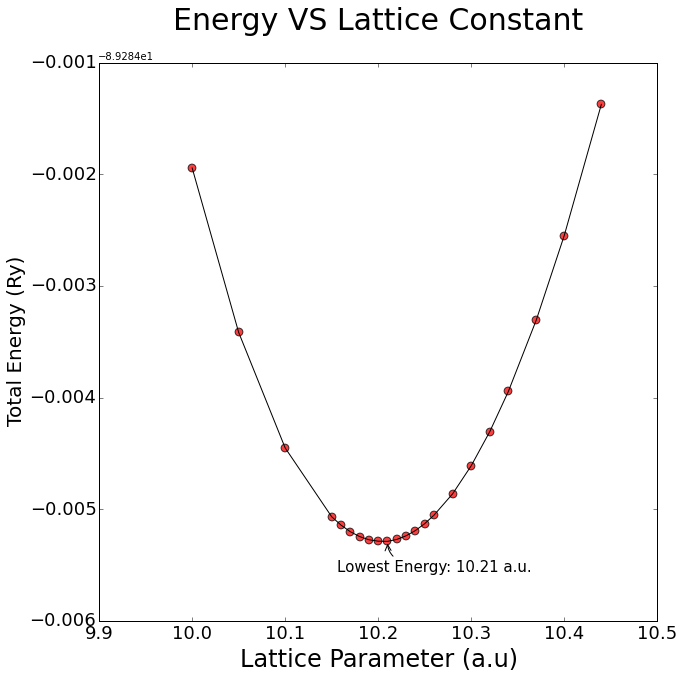

In [39]:
fig, ax0=plt.subplots(nrows=1)
fig.set_size_inches(10,10)

ax0.scatter(x, y_energy,marker='o',alpha=0.75,s=60,c='r')
ax0.plot(x,y_energy,c='black')
ax0.set_title('Energy VS Lattice Constant',fontsize=30,y=1.05)
ax0.set_xlabel('Lattice Parameter (a.u)',fontsize=24)
ax0.set_ylabel(r'Total Energy (Ry)',fontsize=20)
ax0.set_ylim(-89.29,-89.285)
ax0.tick_params(labelsize = 18)
ax0.annotate('Lowest Energy: 10.21 a.u.', xy=(10.21, -89.28929),  xycoords='data',
                xytext=(-50, -30), textcoords='offset points',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle3,angleA=0,angleB=-90"),fontsize=15
                )

# ax1.scatter(x,y_conver,marker='o',alpha=0.75, s=60,c='b')
# ax1.plot(x,y_conver,c='black')
# ax1.set_title('Force Convergence Vs K-points',fontsize=24,y=1.05)
# ax1.set_xlabel('# of K-points',fontsize=24)
# ax1.set_ylabel(r'Force Converge $meV/\AA$',fontsize=18)
# # ax1.set_yscale('log')
# ax1.set_ylim(-1,40)
# ax1.annotate(r'Convergence < 5 $meV/\AA$ # Kpoints: 205', xy=(207, 5),  xycoords='data',
#                 xytext=(0.95, 0.95), textcoords='axes fraction',
#                 arrowprops=dict(facecolor='black', shrink=0.05),
#                 horizontalalignment='right', verticalalignment='top',fontsize=16
#                 )
# ax1.tick_params(labelsize = 18)

plt.subplots_adjust(hspace=0.5)
plt.show()

In [18]:
plt.show()